In [1]:
from activation import *
from cost import *
from dense import Dense
from reshape import Reshape
from conv import Convolution

In [2]:
from mnist import MNIST

In [3]:
d = MNIST()
d.load()
d.load(t='test')

In [24]:
x_train = []
y_train = []

x_test = []
y_test = []

train_count = 10000
test_count = 500

for img, label in zip(d.train_data[:train_count], d.train_labels[:train_count]):
    # x_train.append(img.reshape(28*28, 1))
    x_train.append(img.reshape(1, 28, 28))
    y_train.append(np.zeros((10, 1)))
    y_train[-1][label] = 1
    
for img, label in zip(d.test_data[:test_count], d.test_labels[:test_count]):
    x_test.append(img.reshape(1, 28, 28))
    y_test.append(np.zeros((10, 1)))
    y_test[-1][label] = 1

In [25]:
def test_net(layers):
    correct = 0
    for out, y in zip(x_test, y_test):
        for layer in layers:
            out = layer.forward(out)
        correct += int(np.argmax(y) == np.argmax(out))
    #     print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
    print(correct / len(x_test))

In [27]:
def train_net(layers, res):
    learning_rate = 0.1
    epochs = 200
    res.append(([], []))

    for epoch in range(epochs):
        correct = 0
        tot = 0

        for out, y in zip(x_train, y_train):
            for layer in layers:
                out = layer.forward(out)
            
            grad = mse_prime(y, out) #mse_prime(y, out)
            for layer in reversed(layers):
                grad = layer.backward(grad, learning_rate)

            if np.argmax(out) == np.argmax(y): correct += 1
            tot += 1

            cur_loss = mse(y, out)
            cur_acc = correct / tot
            res[-1][0].append(cur_loss)
            res[-1][1].append(cur_acc)

            if tot % 100 == 0:
                print(f"Epoch {epoch+1}, {(tot/len(x_train))*100:.2f}%: Loss = {cur_loss}, Acc = {cur_acc}", end='\r')
        print()
    
    # test
    test_net(layers)

In [28]:
all_layers = [
[
    Convolution((1, 28, 28), (3, 3), 5),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 16),
    Sigmoid(),
    Dense(16, 10),
    Sigmoid()
], 
[
    Convolution((1, 28, 28), (3, 3), 1),
    Reshape((1, 26, 26), (1 * 26 * 26, 1)),
    Dense(1 * 26 * 26, 16),
    Sigmoid(),
    Dense(16, 16),
    Sigmoid(),
    Dense(16, 10),
    Sigmoid()
],              
# [
#     Convolution((1, 28, 28), (3, 3), 3),
#     Reshape((3, 26, 26), (3 * 26 * 26, 1)),
#     Dense(3 * 26 * 26, 16),
#     Sigmoid(),
#     Dense(16, 16),
#     Sigmoid(),
#     Dense(16, 10),
#     Sigmoid()
# ],
# [
#     Convolution((1, 28, 28), (3, 3), 1),
#     Convolution((1, 26, 26), (3, 3), 1),
#     Convolution((1, 24, 24), (3, 3), 1),
#     Reshape((1, 24, 24), (1 * 24 * 24, 1)),
#     Dense(1 * 24 * 24, 16),
#     Sigmoid(),
#     Dense(16, 16),
#     Sigmoid(),
#     Dense(16, 10),
#     Sigmoid()
# ]
]

res = [] # loss, acc

for i, layers in enumerate(all_layers):
    print(f"Test {i}")
    train_net(layers, res)
    print()

Test 0
Epoch 1, 100.00%: Loss = 0.02616510865171038, Acc = 0.19541414141414145
Epoch 2, 100.00%: Loss = 0.012229145317738586, Acc = 0.3587838383838367
Epoch 3, 100.00%: Loss = 0.01008418738013402, Acc = 0.48325252525252566
Epoch 4, 100.00%: Loss = 0.009650965594464805, Acc = 0.5545383838383866
Epoch 5, 100.00%: Loss = 0.011009873120783645, Acc = 0.6125262626262623
Epoch 6, 100.00%: Loss = 0.010426334045192595, Acc = 0.6648464646464661
Epoch 7, 100.00%: Loss = 0.01028655590424033, Acc = 0.69036060606060655
Epoch 8, 100.00%: Loss = 0.008242470824342887, Acc = 0.7023212121212146
Epoch 9, 100.00%: Loss = 0.007811143892795497, Acc = 0.7145353535353698
Epoch 10, 100.00%: Loss = 0.01037206056772827, Acc = 0.71292222222222287
Epoch 11, 100.00%: Loss = 0.0077980452267752826, Acc = 0.730520202020237
Epoch 12, 100.00%: Loss = 0.005194453692493017, Acc = 0.7193838383838326
Epoch 13, 100.00%: Loss = 0.00769552771580124, Acc = 0.73498484848484931
Epoch 14, 100.00%: Loss = 0.003561359014684194, Acc =

KeyboardInterrupt: 

In [29]:
test_net(all_layers[0])

0.568


/Users/gauravk/Documents/ML_implementations/activation.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
# peak: 2 64 hu - 95.36% acc

In [20]:
import matplotlib.pyplot as plt

In [30]:
loss, acc = res[0]

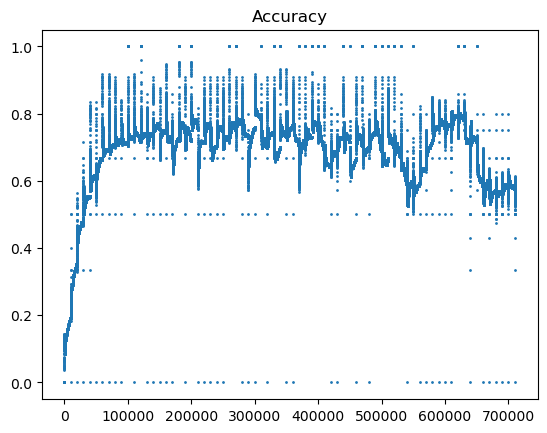

In [31]:
plt.scatter(range(len(acc)), acc, s=1)
plt.title("Accuracy")
plt.show()

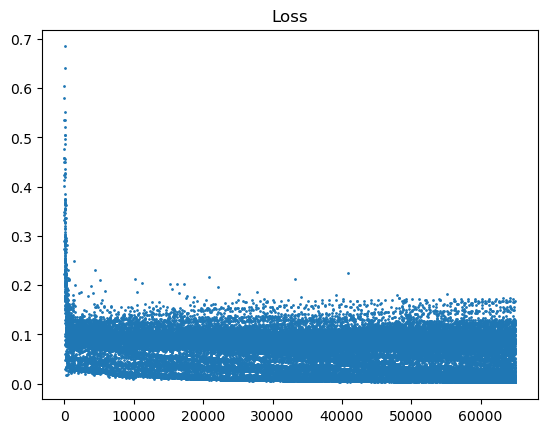

In [23]:
plt.scatter(range(len(loss)), loss, s=1)
plt.title("Loss")
plt.show()